YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


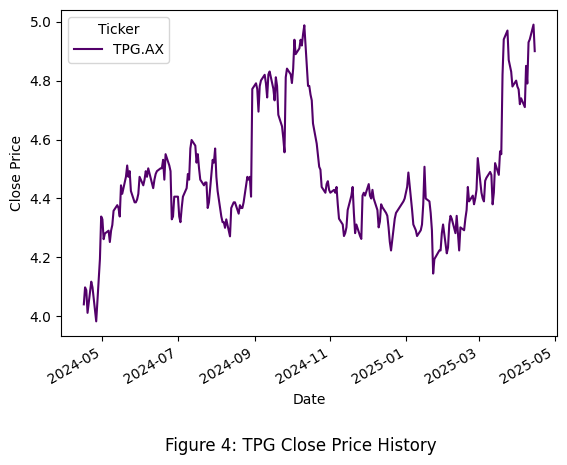

[*********************100%***********************]  1 of 1 completed


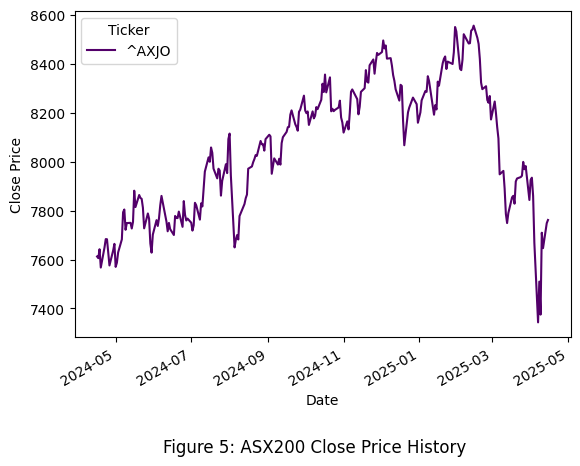

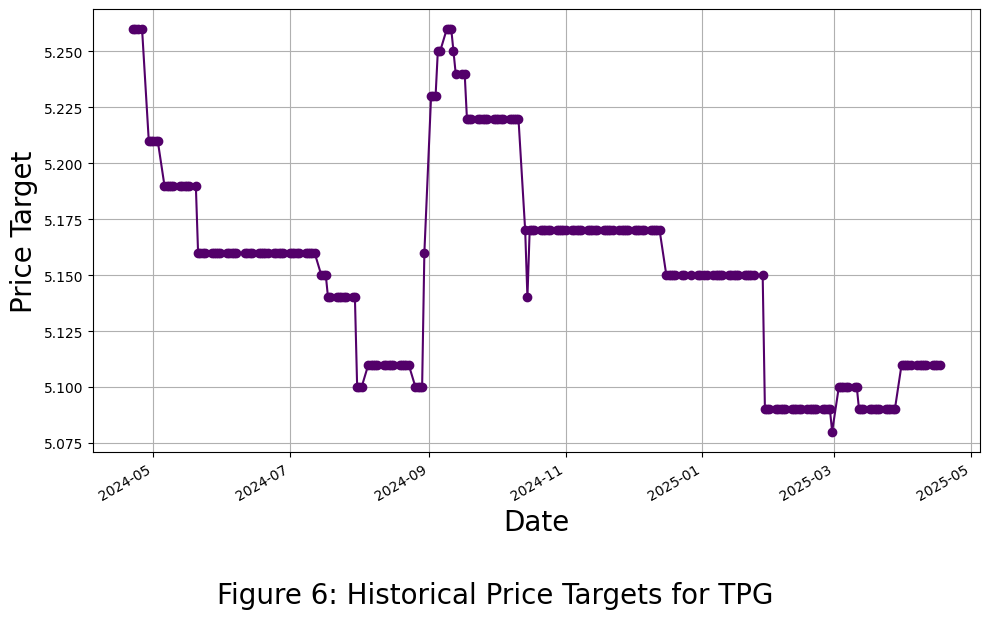

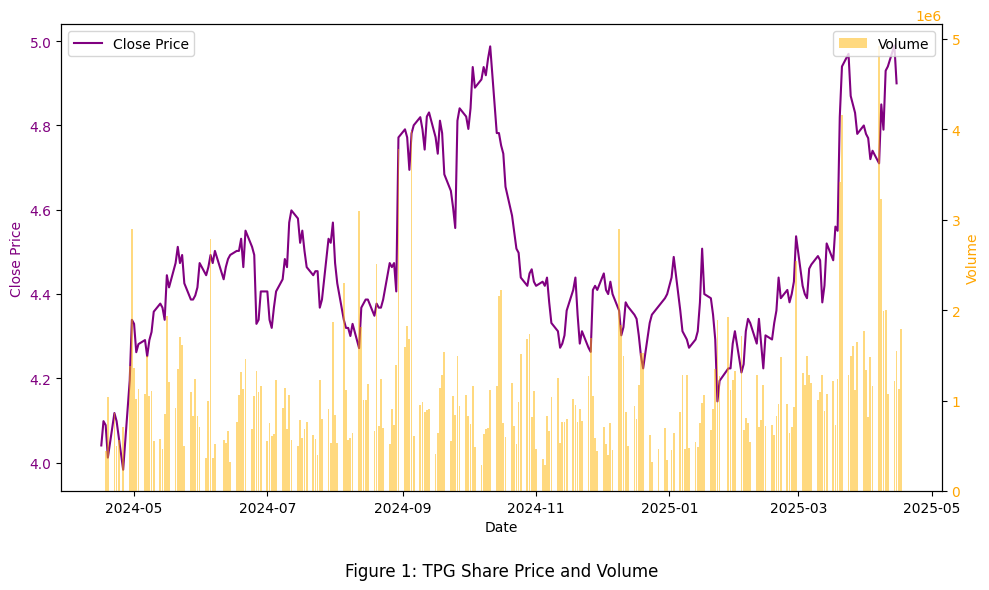

In [ ]:
#Install and import necessary Python libraries
!python3 -m pip install yfinance
!python3 -m pip install xlrd
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting

#Graph 1: TPG Share Price History
tpg = yf.download(
    tickers='TPG.AX', 
    start='2024-04-16', 
    end='2025-04-16'
)
tpg

# Ensure the 'Date' column is in datetime format and set it as the index
tpg.reset_index(inplace=True)
tpg['Date'] = pd.to_datetime(tpg['Date'])
tpg.set_index('Date', inplace=True)

tpg['Close'].plot(color='#53006A')  # Set the line color to purple
plt.suptitle('Figure 4: TPG Close Price History', y=-0.01) 
plt.xlabel('Date')  
plt.ylabel('Close Price')  

plt.savefig('tpg_close_price_history.png', bbox_inches='tight')
plt.show()  # Display the graph

#Graph 2: ASX200 Share Price History
asx200 = yf.download(
    tickers='^AXJO', 
    start='2024-04-16', 
    end='2025-04-16'
)
asx200

asx200['Close'].plot(color='#53006A')  # Set the line color to purple
plt.suptitle('Figure 5: ASX200 Close Price History', y=-0.01)
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.savefig('asx200_close_price_history.png', bbox_inches='tight')
plt.show()  # Display the graph

#Graph 3:  Historical Price Targets on the Research (taken from a CSV file)

# Load the data from the CSV file
price_targets = pd.read_csv('Historical_Price_Targets.csv')

# Ensure the 'Date' column is in datetime format
price_targets['Date'] = pd.to_datetime(price_targets['Date'])

# Set the 'Date' column as the index
price_targets.set_index('Date', inplace=True)

# Plot the Price Target data
price_targets['Price Target'].plot(figsize=(10, 6), color='#53006A', marker='o', linestyle='-')
plt.suptitle('Figure 6: Historical Price Targets for TPG', fontsize=20, y=-0.05)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price Target', fontsize=20)
plt.grid(True)
plt.tight_layout()

# Save the graph
plt.savefig('historical_price_targets_tpg.png', bbox_inches='tight')

#Graph 4: TPG Share Price and Volume (not required in the orginal task sheet)

# Load the TPG share price data from the Excel file
tpg_data = pd.read_excel('TPGsharepricedata.xls', sheet_name=0)

# Ensure the 'Date' column is in datetime format
tpg_data['Date'] = pd.to_datetime(tpg_data['Date'])

# Set the 'Date' column as the index
tpg_data.set_index('Date', inplace=True)

# Display the graph
plt.show()
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure and axis for the first y-axis
ax1.plot(tpg.index, tpg['Close'], color='purple', label='Close Price')  # Plot the Close Price
ax1.set_xlabel('Date')  # Set x-axis label
ax1.set_ylabel('Close Price', color='purple')  # Set y-axis label for the first axis
ax1.tick_params(axis='y', labelcolor='purple')  # Set tick parameters for the first axis

# Create a second y-axis for the volume
ax2 = ax1.twinx()
ax2.bar(tpg_data.index, tpg_data['Volume'], color='#FFB401', alpha=0.5, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legend
plt.title('Figure 1: TPG Share Price and Volume', y=-0.2)
fig.tight_layout()
# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Save the updated graph
plt.savefig('TPG share price and volume.png', bbox_inches='tight')